In [1]:
import uproot
import numpy as np
import awkward as ak
from numba import njit
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid
import ROOT
import matplotlib.pyplot as plt

Loading CENNSMC Root Utilities


TFile::Init:0: RuntimeWarning: no StreamerInfo found in /geode2/home/u015/bojohn/Quartz/cohar750_sim/builddir/lib/libcenns_io_rdict.pcm therefore preventing schema evolution when reading this file. The file was produced with ROOT version 6.28/04, while the current version is 6.32.02
Error in <TUnixSystem::Load>: version mismatch, /geode2/home/u015/bojohn/Quartz/cohar750_sim/builddir/lib/libcenns_io.so = 62804, ROOT = 63202


In [2]:
ROOT.gStyle.SetOptStat(0)

## Ar39 background

Data from DEAP-3600 thesis of Ar39 energy spectrum

In [3]:
x = [0, 0.0001, 4.460303300624442, 9.36663693131133, 15.165031222123105, 23.639607493309544, 32.56021409455843, 41.03479036574487, 49.95539696699375, 60.66012488849242, 70.4727921498662, 79.39339875111507, 90.54415700267619, 100.35682426404996, 111.50758251561106, 122.21231043710972, 134.70115967885818, 147.1900089206066, 160.12488849241748, 170.82961641391614, 182.87243532560214, 195.36128456735057, 210.08028545941124, 223.46119536128458, 236.39607493309546, 248.43889384478143, 259.58965209634255, 272.52453166815343, 285.90544157002677, 298.3942908117752, 310.8831400535236, 321.1418376449599, 331.84656556645854, 342.5512934879572, 351.02586975914363, 361.28456735057983, 369.3131132917038, 380.9099018733274, 389.3844781445138, 398.3050847457627, 406.3336306868867, 413.9161462979483, 421.05263157894734, 428.6351471900089, 438.00178412132027, 446.4763603925067, 456.28902765388045, 464.7636039250669, 473.6842105263158, 481.26672613737736, 489.29527207850134, 496.43175735950047, 506.69045495093667, 514.2729705619982, 520.9634255129349, 528.099910793934, 536.128456735058, 542.8189116859946, 549.9553969669937, 557.0918822479929, 564.6743978590545]
y = [0, 5.47289972899729, 5.47289972899729, 5.510840108401084, 5.596205962059621, 5.738482384823848, 5.890243902439024, 6.032520325203252, 6.146341463414634, 6.3075880758807585, 6.430894308943089, 6.5257452574525745, 6.649051490514905, 6.734417344173441, 6.838753387533875, 6.914634146341463, 6.990514905149051, 7.056910569105691, 7.1043360433604335, 7.132791327913279, 7.151761517615176, 7.161246612466124, 7.151761517615176, 7.1043360433604335, 7.037940379403794, 6.9620596205962055, 6.8861788617886175, 6.762872628726287, 6.611111111111111, 6.430894308943089, 6.2317073170731705, 6.060975609756097, 5.85230352303523, 5.624661246612466, 5.434959349593496, 5.197831978319783, 4.9891598915989155, 4.695121951219512, 4.457994579945799, 4.182926829268292, 3.9457994579945797, 3.708672086720867, 3.5, 3.2344173441734414, 2.9498644986449865, 2.6747967479674797, 2.361788617886179, 2.0772357723577235, 1.8211382113821137, 1.5745257452574526, 1.3563685636856369, 1.119241192411924, 0.8536585365853658, 0.6639566395663956, 0.502710027100271, 0.3509485094850948, 0.2181571815718157, 0.13279132791327913, 0.056910569105691054, 0.018970189701897018, 0]
spl = CubicSpline(x, y)

In [4]:
xs = np.linspace(0, 560, 100)
ys = spl(xs)
g1 = ROOT.TGraph(len(x), np.array(x), np.array(y))

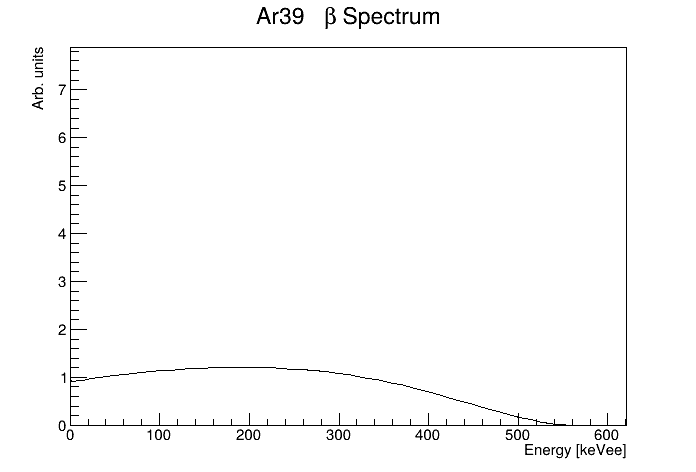

In [5]:
c = ROOT.TCanvas()
g1.SetTitle("Ar39 #beta Spectrum;Energy [keVee];Arb. units")
g1.Scale(476.0 / g1.Integral())
g1.Draw("alc")
c.Draw()

In [6]:
norm = trapezoid(ys, xs)
ys_norm = ys / norm * 476
norm_spl = CubicSpline(xs, ys_norm)

In [7]:
h_ar39spec = ROOT.TH1F("h_ar39spec", "COH-Ar-750 Ar39 #beta Spectrum;Energy [keVee];Counts/s", 100, 0, 200)
h_ar39spec.Sumw2()
bin_width = h_ar39spec.GetBinWidth(1)
nbins = h_ar39spec.GetNbinsX()
for b in range(1, nbins+1):
    center = h_ar39spec.GetBinCenter(b)
    h_ar39spec.SetBinContent(b, norm_spl(center) * bin_width)
    h_ar39spec.SetBinError(b, np.sqrt(norm_spl(center) * bin_width))
h_ar39spec.Integral()

221.52225041389465

In [7]:
h_ar39spec = ROOT.TH1F("h_ar39spec", "COH-Ar-750 Ar39 #beta Spectrum;Energy [keVee];Counts/s", 100, 0, 200)
h_ar39spec.Sumw2()
bin_width = h_ar39spec.GetBinWidth(1)
nbins = h_ar39spec.GetNbinsX()
for b in range(1, nbins+1):
    center = h_ar39spec.GetBinCenter(b)
    h_ar39spec.SetBinContent(b, g1.Eval(center) * bin_width)
    h_ar39spec.SetBinError(b, np.sqrt(g1.Eval(center) * bin_width))
h_ar39spec.Integral()

221.52361595630646

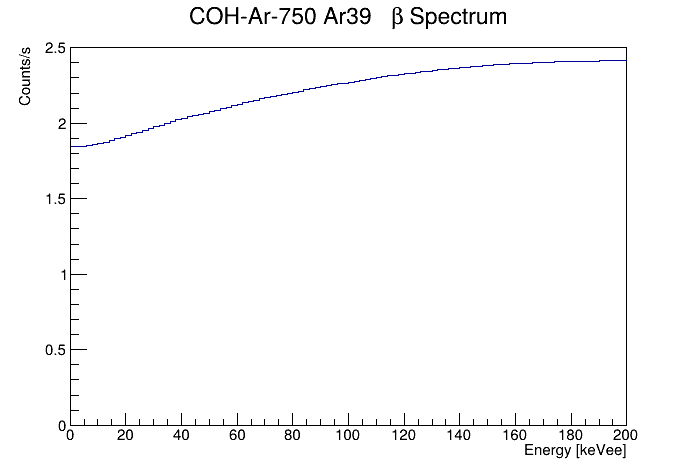

In [8]:
# %jsroot on
c2 = ROOT.TCanvas()
h_ar39spec.GetYaxis().SetRangeUser(0, 2.5)
h_ar39spec.Draw('hist')
c2.Draw()

In [9]:
with uproot.open("~/ceem_coherent/CENNS750/sim_out/4854112/output_comp.root:CENNS") as cenns: # events throughout LAr volume
# with uproot.open("~/ceem_coherent/CENNS750/sim_out/5012974/output_comp.root:CENNS") as cenns: # events at center of detector
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
z = ak.zip({"en": en, "chans": chans, "top": top}, depth_limit=1)

In [10]:
h_sim = ROOT.TH1F("h_sim", "Simulation energy distribution;Event energy [keVee];Counts", 100, 0, 200)
h_sim.FillN(len(z['en']), np.array(z['en'] * 1000), np.ones(len(z['en'])))

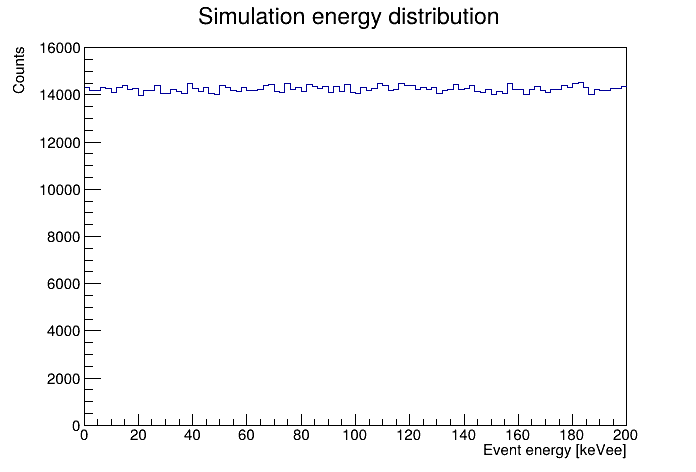

In [11]:
# %jsroot on
c3 = ROOT.TCanvas()
h_sim.SetStats(0)
h_sim.GetYaxis().SetRangeUser(0, 16000)
h_sim.Draw("hist")
ROOT.gPad.SetLeftMargin(0.12)
c3.Update()

In [12]:
h3 = h_ar39spec.Clone()
h3.Divide(h_sim)

True

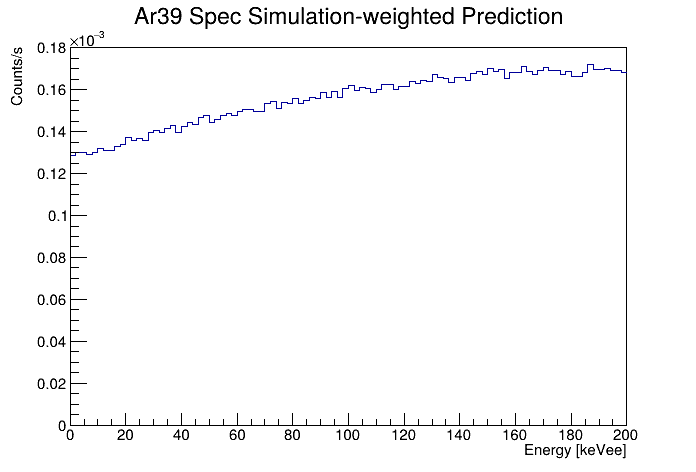

In [13]:
# %jsroot on
c4 = ROOT.TCanvas()
h3.SetTitle("Ar39 Spec Simulation-weighted Prediction")
h3.GetYaxis().SetRangeUser(0, 1.8e-4)
h3.Draw("hist")
c4.Update()

In [14]:
@njit
def detector_response(events, rng):
    lys = []
    ens = []
    sigma = 0.44
    for event in events:
        top_pes = []
        bot_pes = []
        total_pes = 0.0
        for top, chan in zip(event['top'], event['chans']):
            chan = np.array(chan)
            smeared_pes = rng.normal(1.0, sigma, len(chan))
            smeared_pes[smeared_pes < 0.0] = 0.0
            total_pes += sum(smeared_pes)
            if top:
                top_pes.append(sum(smeared_pes))
            else:
                bot_pes.append(sum(smeared_pes))
        if sum(top_pes) >= 2 and sum(bot_pes) >= 2:
            lys.append(total_pes)
            ens.append(event['en'] * 1000)
    return np.array(lys), np.array(ens)

In [15]:
rng = np.random.default_rng(1234)
lys, ens = detector_response(z, rng)
h_resp = ROOT.TH2F("h_resp", "COH-Ar-750 e- response;PEs (smear);True energy [keVee]", 333, 0, 1000, 100, 0, 200)
# weights = np.ones(len(ens))
# for (i, en) in enumerate(ens):
#     weights[i] = h3.GetBinContent(h3.FindBin(en))
# h_resp.FillN(len(ens), lys, ens, weights)
h_resp.FillN(len(ens), lys, ens, np.ones(len(ens)))

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       137964
NDf                       =          331
Edm                       =   7.2424e-19
NCalls                    =           15
p0                        =      0.16586   +/-   1.49996e-05 


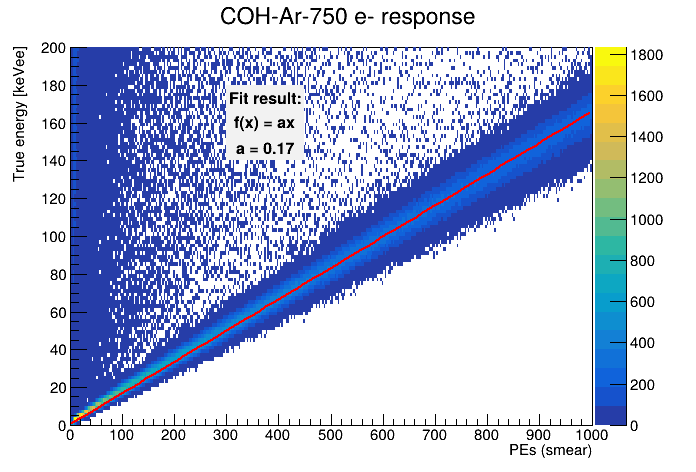

In [16]:
# %jsroot on
c5 = ROOT.TCanvas()
profx = h_resp.ProfileX()
fit_func = ROOT.TF1("fit_func", "[0] * x", 0, 1000)
profx.Fit(fit_func, "R")
h_resp.Draw("colz")
h_resp.SetStats(0)
fit_func.Draw("same")
tpave = ROOT.TPaveText(300, 140, 450, 180, "user")
tpave.AddText("Fit result:")
tpave.AddText("f(x) = ax")
tpave.AddText(f"a = {fit_func.GetParameter(0):0.2f}")
tpave.Draw("same")
c5.SetRightMargin(0.15)
c5.Draw()

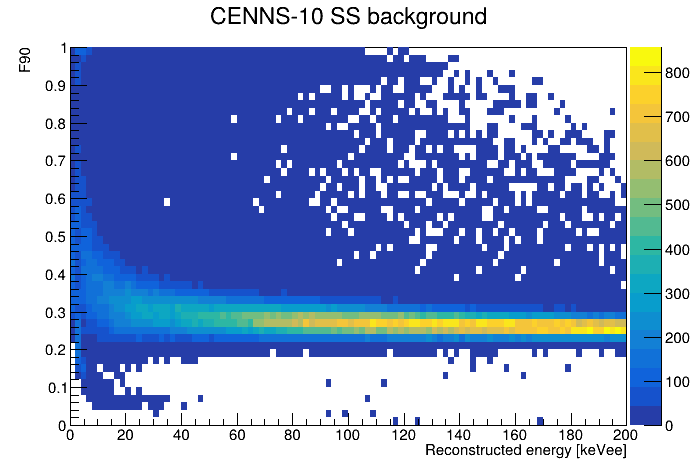

In [17]:
# F90 vs recon energy from CENNS-10
f = ROOT.TFile.Open("../data/nowater_f90.root")
bkg = f["bkg"]
c = ROOT.TCanvas()
bkg.Draw('colz')
bkg.SetTitle("CENNS-10 SS background")
bkg.GetXaxis().SetTitle("Reconstructed energy [keVee]")
bkg.GetYaxis().SetTitle("F90")
c.Draw()

In [47]:
bkg_keep = bkg.Clone()

In [18]:
@njit
def er_f90_cut(events, rng):
    lys = []
    ens = []
    f90s = []
    sigma = 0.44
    for event in events:
        top_pes = []
        bot_pes = []
        total_pes = 0.0
        f90_pes = 0.0
        for top, chan in zip(event['top'], event['chans']):
            chan = np.array(chan)
            smeared_pes = rng.normal(1.0, sigma, len(chan))
            smeared_pes[smeared_pes < 0.0] = 0.0
            total_pes += sum(smeared_pes)
            f90_pes += sum(smeared_pes[chan <= 90.0])
            if top:
                top_pes.append(np.sum(smeared_pes))
            if not top:
                bot_pes.append(np.sum(smeared_pes))
        if total_pes == 0:
            f90 = 0.0
        else:
            f90 = f90_pes / total_pes
        f90_cut = f90 > 0.5 and f90 < 0.9
        if sum(top_pes) >= 2 and sum(bot_pes) >= 2 and f90_cut:
        # if sum(top_pes) >= 2 and sum(bot_pes) >= 2:
            lys.append(total_pes)
            ens.append(event['en'] * 1000)
            f90s.append(f90)
    return np.array(lys), np.array(ens), np.array(f90s)
    # return np.array(lys), np.array(ens)

In [19]:
@njit
def er_nof90_cut(events, rng):
    lys = []
    ens = []
    sigma = 0.44
    for event in events:
        top_pes = []
        bot_pes = []
        total_pes = 0.0
        for top, chan in zip(event['top'], event['chans']):
            chan = np.array(chan)
            smeared_pes = rng.normal(1.0, sigma, len(chan))
            smeared_pes[smeared_pes < 0.0] = 0.0
            total_pes += sum(smeared_pes)
            if top:
                top_pes.append(np.sum(smeared_pes))
            if not top:
                bot_pes.append(np.sum(smeared_pes))
        if sum(top_pes) >= 2 and sum(bot_pes) >= 2:
            lys.append(total_pes)
            ens.append(event['en'] * 1000)
    return np.array(lys), np.array(ens)

In [20]:
rng = np.random.default_rng(1234)
lys, ens, f90s = er_f90_cut(z, rng)
h_ar39f90 = ROOT.TH1F("h_ar39f90", "Ar39 Signal Prediction (F90);Energy [keVee];Counts/s", 20, 0, 20)
for ly, en in zip(lys, ens):
    reco_en = fit_func.Eval(ly)
    weight_bin = h3.FindBin(en)
    weight = h3.GetBinContent(weight_bin)
    h_ar39f90.Fill(reco_en, weight)

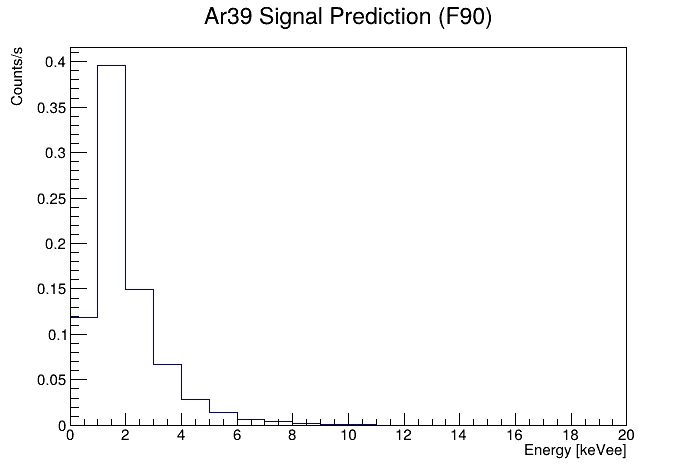

In [22]:
c = ROOT.TCanvas()
h_ar39f90.Draw("hist")
c.Draw()

In [23]:
rng = np.random.default_rng(1234)
lys, ens = er_nof90_cut(z, rng)
h_ar39full = ROOT.TH2F("h_ar39full", "Ar39 Signal Prediction;Reconstructed energy [keVee];Reconstructed F90", 100, 0, 200, 50, 0, 1)
for ly, en in zip(lys, ens):
    reco_en = fit_func.Eval(ly)
    weight_bin = h3.FindBin(en)
    weight = h3.GetBinContent(weight_bin)
    b = bkg.ProjectionX().FindBin(reco_en)
    f90 = bkg.ProjectionY("", b, b + 1).GetRandom()
    h_ar39full.Fill(reco_en, f90, weight)

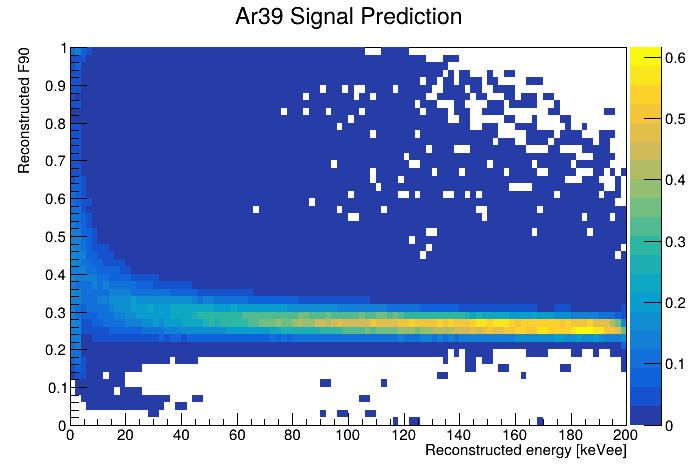

In [24]:
# %jsroot on
c6 = ROOT.TCanvas()
h_ar39full.Draw("colz")
c6.Draw()

In [27]:
# rng = np.random.default_rng(1234)
# lys, ens = er_f90_cut(z, rng)
h_ar39adjf90 = ROOT.TH1F("h_ar39adjf90", "Ar39 Signal Prediction;Reconstructed energy [keVee];Events [/s]", 40, 0, 40)
for ly, en in zip(lys, ens):
    reco_en = fit_func.Eval(ly)
    weight_bin = h3.FindBin(en)
    weight = h3.GetBinContent(weight_bin)
    b = bkg.ProjectionX().FindBin(reco_en)
    f90 = bkg.ProjectionY("", b, b + 1).GetRandom()
    if f90 < 0.5 or f90 > 0.9:
        continue
    h_ar39adjf90.Fill(reco_en, weight)

Warning in <TFile::Append>: Replacing existing TH1: h_ar39adjf90 (Potential memory leak).


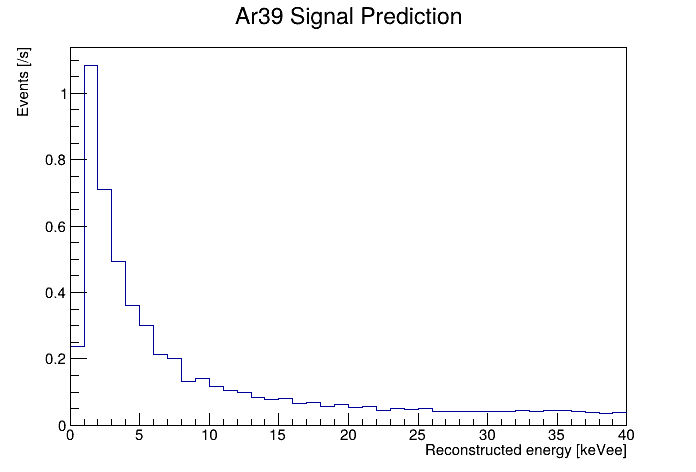

In [28]:
# %jsroot on
c7 = ROOT.TCanvas()
h_ar39adjf90.Draw("hist")
c7.Draw()

In [29]:
b1 = h_ar39adjf90.FindBin(5)
b2 = h_ar39adjf90.FindBin(40)
h_ar39adjf90.Integral(b1, b2)

4.620998241007328

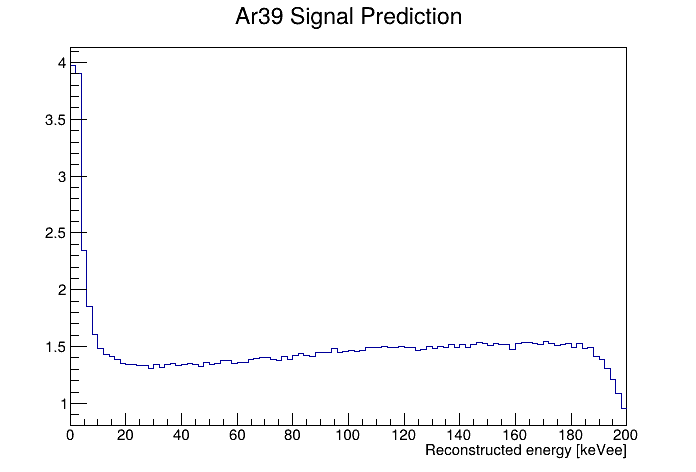

In [37]:
c7 = ROOT.TCanvas()
h_ar39_full.ProjectionX().Draw("hist")
c7.Draw()

In [36]:
rng = np.random.default_rng(1234)
lys, ens = er_nof90_cut(z, rng)
h_ar39nof90 = ROOT.TH1F("h_ar39nof90", "Ar39 Signal Prediction (no F90);Energy [keVee];Counts/s", 100, 0, 200)
for l, e in zip(lys, ens):
    reco_en = fit_func.Eval(l)
    weight_bin = h3.FindBin(e)
    weight = h3.GetBinContent(weight_bin)
    h_ar39nof90.Fill(reco_en, weight)

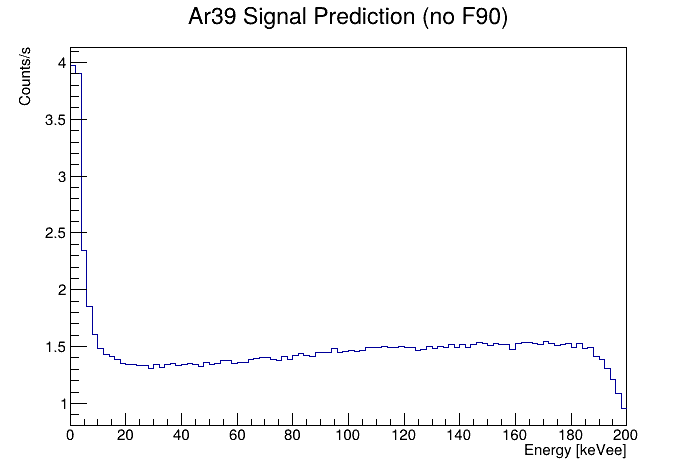

In [39]:
# %jsroot on
c7 = ROOT.TCanvas()
h_ar39_nof90.Draw("hist")
c7.Draw()

In [37]:
f = ROOT.TFile("../data/cohar750_ar39.root", "recreate")
g1.Write()
h_ar39spec.Write()
h3.Write()
h_resp.Write()
fit_func.Write()
h_ar39f90.Write()
h_ar39newf90.Write()
h_ar39full.Write()
h_ar39nof90.Write()
f.Close()

AttributeError: 'CPyCppyy_NoneType' object has no attribute 'Write'

## Looking to make a TTree with all the events from the simulation and make cuts on the tree instead

In [28]:
@njit
def create_tree(events, rng):
    lys = []
    ens = []
    f90s = []
    top_lys = []
    bot_lys = []
    sigma = 0.44
    for event in events:
        top_pes = 0.0
        bot_pes = 0.0
        total_pes = 0.0
        f90_pes = 0.0
        for top, chan in zip(event['top'], event['chans']):
            chan = np.array(chan)
            smeared_pes = rng.normal(1.0, sigma, len(chan))
            smeared_pes[smeared_pes < 0.0] = 0.0
            total_pes += sum(smeared_pes)
            f90_pes += sum(smeared_pes[chan <= 90.0])
            if top:
                top_pes += sum(smeared_pes)
            if not top:
                bot_pes += sum(smeared_pes)
        if total_pes == 0:
            f90 = 0
        else:
            f90 = f90_pes / total_pes
        lys.append(total_pes)
        ens.append(event['en'] * 1000)
        f90s.append(f90)
        top_lys.append(top_pes)
        bot_lys.append(bot_pes)
    return np.array(lys), np.array(ens), np.array(f90s), np.array(top_lys), np.array(bot_lys)

In [29]:
rng = np.random.default_rng(1234)
lys, ens, f90s, tops, bots = create_tree(z, rng)

In [31]:
f = uproot.recreate("../data/cohar750_ar39_sim.root")
f['tree'] = { "lys": lys, "ens": ens, "f90s": f90s, "tops": tops, "bots": bots }
f.close()